<a href="https://colab.research.google.com/github/sherylsqin/CE888/blob/master/lab4/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [99]:
df=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
df.head()







,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [100]:
features = ["age",
            "job",
            "education",
            "housing",
            "loan",
            "duration"]
df[features].head()

,age,job,education,housing,loan,duration
0,56,housemaid,basic.4y,no,no,261
1,57,services,high.school,no,no,149
2,37,services,high.school,yes,no,226
3,40,admin.,basic.6y,no,no,151
4,56,services,high.school,no,yes,307


In [101]:
df[["job"]] = df[["job"]].apply(LabelEncoder().fit_transform)
df[["marital"]] = df[["marital"]].apply(LabelEncoder().fit_transform)
df[["education"]] = df[["education"]].apply(LabelEncoder().fit_transform)
df[["default"]] = df[["default"]].apply(LabelEncoder().fit_transform)
df[["housing"]] = df[["housing"]].apply(LabelEncoder().fit_transform)
df[["loan"]] = df[["loan"]].apply(LabelEncoder().fit_transform)
df[["contact"]] = df[["contact"]].apply(LabelEncoder().fit_transform)
df[["month"]] = df[["month"]].apply(LabelEncoder().fit_transform)
df[["day_of_week"]] = df[["day_of_week"]].apply(LabelEncoder().fit_transform)
df[["poutcome"]] = df[["poutcome"]].apply(LabelEncoder().fit_transform)
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [0]:
df = df.dropna()

predict_y = ["y"]


X_df = df[features].copy()
y_df = df[predict_y].copy()

print(X_df.head().to_latex())

print(y_df.values)


y_df = df[predict_y].copy()

y_df[predict_y] = y_df[predict_y].apply(LabelEncoder().fit_transform)

print(y_df)

In [0]:
X = X_df.values
y = y_df.values.T[0]

y_df.head()

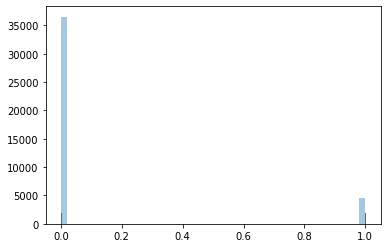

In [104]:
sns_plot = sns.distplot(y, kde=False, rug=True)

In [123]:
from sklearn.model_selection import train_test_split
clf = ExtraTreesClassifier(n_estimators=100, max_depth=4)

df_dummies = pd.get_dummies(df)

X = df_dummies.drop(columns=["y"]).copy()
y = df_dummies["y"].copy()

dummy_clf = DummyClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

scores = cross_val_score(clf, X_train, y_train, cv=10,scoring = make_scorer(acc))

dummy_clf.fit(X_train, y_train)

print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f"% (acc(y,dummy_clf.predict(X))))

ACC: 0.90 +/- 0.00
Dummy ACC: 0.80


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [124]:
clf = ExtraTreesClassifier(n_estimators=100, max_depth=4)
clf.fit(X_train,y_train)

print(acc(y_train,clf.predict(X_train)))

0.9003503173667233


In [0]:
df = df.drop('duration',1)

(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

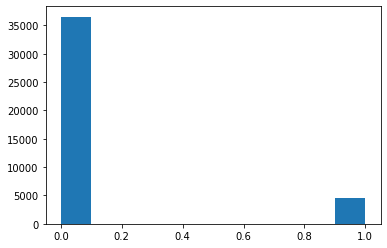

In [108]:
plt.hist(y)

In [125]:
clf = ExtraTreesClassifier(n_estimators=1000, max_depth=4)
clf.fit(X_train,y_train)

print(acc(y_test,clf.predict(X_test)))

0.8983572064416929


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


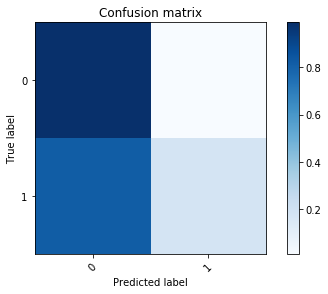

In [126]:
# Compute confusion matrix
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

#plt.savefig("confusion.png",bbox_inches='tight')
#plt.savefig("confusion.pdf",bbox_inches='tight')

[11 18 17 14 13 16 15  7 12  8  4  0  3  9 10  1  2  5  6]
Feature ranking:
19 (28831, 19)
1. pdays (0.266441)
2. nr.employed (0.198312)
3. euribor3m (0.166178)
4. emp.var.rate (0.106966)
5. poutcome (0.095686)
6. cons.conf.idx (0.052396)
7. cons.price.idx (0.036452)
8. contact (0.024164)
9. previous (0.017031)
10. month (0.016847)
11. default (0.007572)
12. age (0.005291)
13. education (0.002098)
14. day_of_week (0.001301)
15. campaign (0.001199)
16. job (0.000909)
17. marital (0.000811)
18. housing (0.000232)
19. loan (0.000115)


(0, 0.5660063624460248)

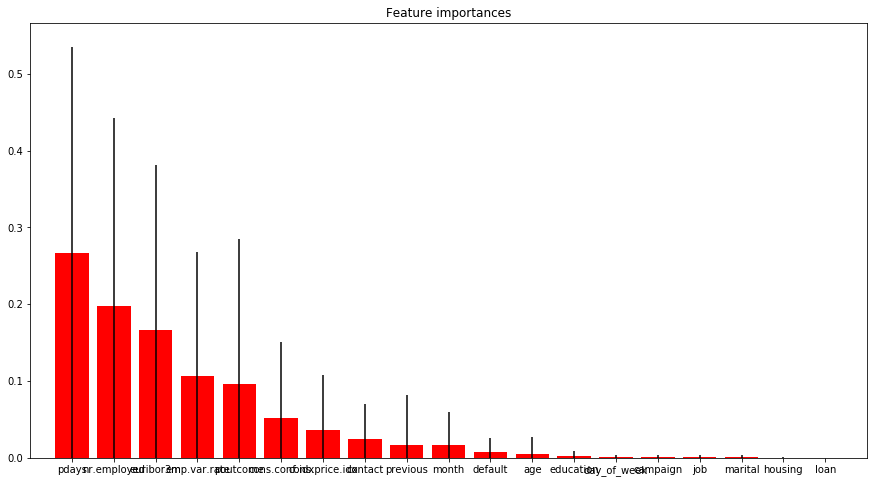

In [137]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

features = list(df_dummies.columns[:-1])
print(len(features), X_train.shape)

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices])
plt.xlim([-1, X_train.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])